In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest

In [3]:
df = pd.read_csv('DSBDALExam DataSets/BreastCancer/BreastCancerWc.csv', header=None)

In [4]:
df.columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

In [5]:
df.index.name = 'Id'

In [6]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Id,,,,,,,,,,,
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4


In [7]:
df.shape

(699, 11)

# Data Cleaning

In [8]:
df.replace('?', pd.NA, inplace=True)

In [9]:
df.dropna(inplace=True)

In [10]:
numeric_cols = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']

In [11]:
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [12]:
df.dropna(inplace=True)

In [13]:
df = df[(df[numeric_cols] >= 0).all(1)]

In [14]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Id,,,,,,,,,,,
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4


In [15]:
df.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [16]:
np.random.seed(42)
mask = np.random.rand(*df.shape) < 0.5
df[mask] = np.nan

In [17]:
df.isna().sum()

Sample code number             344
Clump Thickness                325
Uniformity of Cell Size        365
Uniformity of Cell Shape       352
Marginal Adhesion              361
Single Epithelial Cell Size    353
Bare Nuclei                    350
Bland Chromatin                336
Normal Nucleoli                344
Mitoses                        339
Class                          325
dtype: int64

In [18]:
df.fillna(df.mode().iloc[0], inplace=True)

In [19]:
df.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [20]:
df.isna().sum().sum()

0

In [21]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Id,,,,,,,,,,,
0,411453.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1002945.0,5.0,1.0,1.0,1.0,2.0,10.0,3.0,1.0,1.0,2.0
2,411453.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,1016277.0,6.0,8.0,1.0,1.0,3.0,1.0,3.0,1.0,1.0,2.0
4,411453.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
694,411453.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
695,411453.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0
696,411453.0,1.0,1.0,1.0,1.0,7.0,1.0,8.0,10.0,2.0,2.0


# Error Correcting / Outlier Removal

In [22]:
iso = IsolationForest(contamination=0.1)
outliers = iso.fit_predict(df.drop('Class', axis=1))
df = df[outliers == 1]

In [23]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Id,,,,,,,,,,,
0,411453.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1002945.0,5.0,1.0,1.0,1.0,2.0,10.0,3.0,1.0,1.0,2.0
2,411453.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,1016277.0,6.0,8.0,1.0,1.0,3.0,1.0,3.0,1.0,1.0,2.0
4,411453.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
693,411453.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0
694,411453.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
695,411453.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0


# Data Transformation

In [24]:
X = df.drop('Class', axis=1)
y = df['Class']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [39]:
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

In [40]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
cr_lr = classification_report(y_test, y_pred_lr, zero_division=1)

In [41]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [42]:
y_pred_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

In [43]:
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
cr_gnb = classification_report(y_test, y_pred_gnb, zero_division=1)

In [44]:
accuracy_benign_lr = accuracy_score(y_test[y_test == 2], y_pred_lr[y_test == 2])
accuracy_malignant_lr = accuracy_score(y_test[y_test == 4], y_pred_lr[y_test == 4])

In [45]:
accuracy_benign_gnb = accuracy_score(y_test[y_test == 2], y_pred_gnb[y_test == 2])
accuracy_malignant_gnb = accuracy_score(y_test[y_test == 4], y_pred_gnb[y_test == 4])

In [46]:
print("Accuracy of Logistic Regression - Benign Tumors:", accuracy_benign_lr)
print("Accuracy of Logistic Regression - Malignant Tumors:", accuracy_malignant_lr)

Accuracy of Logistic Regression - Benign Tumors: 1.0
Accuracy of Logistic Regression - Malignant Tumors: 0.0


In [47]:
print("Accuracy of Naïve Bayes - Benign Tumors:", accuracy_benign_gnb)
print("Accuracy of Naïve Bayes - Malignant Tumors:", accuracy_malignant_gnb)

Accuracy of Naïve Bayes - Benign Tumors: 1.0
Accuracy of Naïve Bayes - Malignant Tumors: 0.0


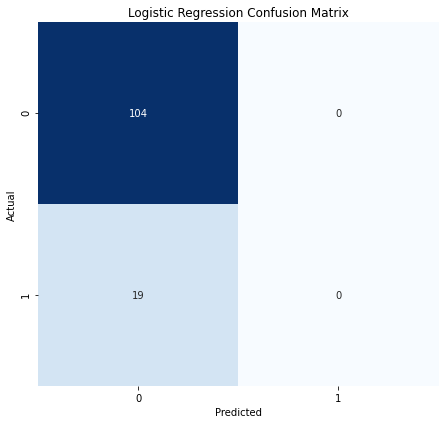

In [48]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

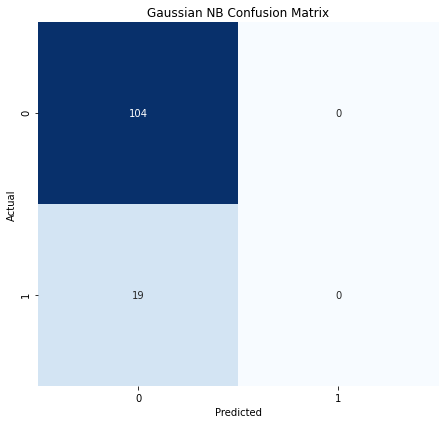

In [49]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Gaussian NB Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [50]:
print('Logistic Regression Classification Report')
print(cr_lr)

Logistic Regression Classification Report
              precision    recall  f1-score   support

         2.0       0.85      1.00      0.92       104
         4.0       1.00      0.00      0.00        19

    accuracy                           0.85       123
   macro avg       0.92      0.50      0.46       123
weighted avg       0.87      0.85      0.77       123



In [51]:
print('Gaussian NB Classification Report')
print(cr_gnb)

Gaussian NB Classification Report
              precision    recall  f1-score   support

         2.0       0.85      1.00      0.92       104
         4.0       1.00      0.00      0.00        19

    accuracy                           0.85       123
   macro avg       0.92      0.50      0.46       123
weighted avg       0.87      0.85      0.77       123



In [52]:
print('Logistic Regression Accuracy Score')
print(accuracy_lr*100)

Logistic Regression Accuracy Score
84.5528455284553


In [53]:
print('Gaussian NB Accuracy Score')
print(accuracy_gnb*100)

Gaussian NB Accuracy Score
84.5528455284553


<Figure size 864x576 with 0 Axes>

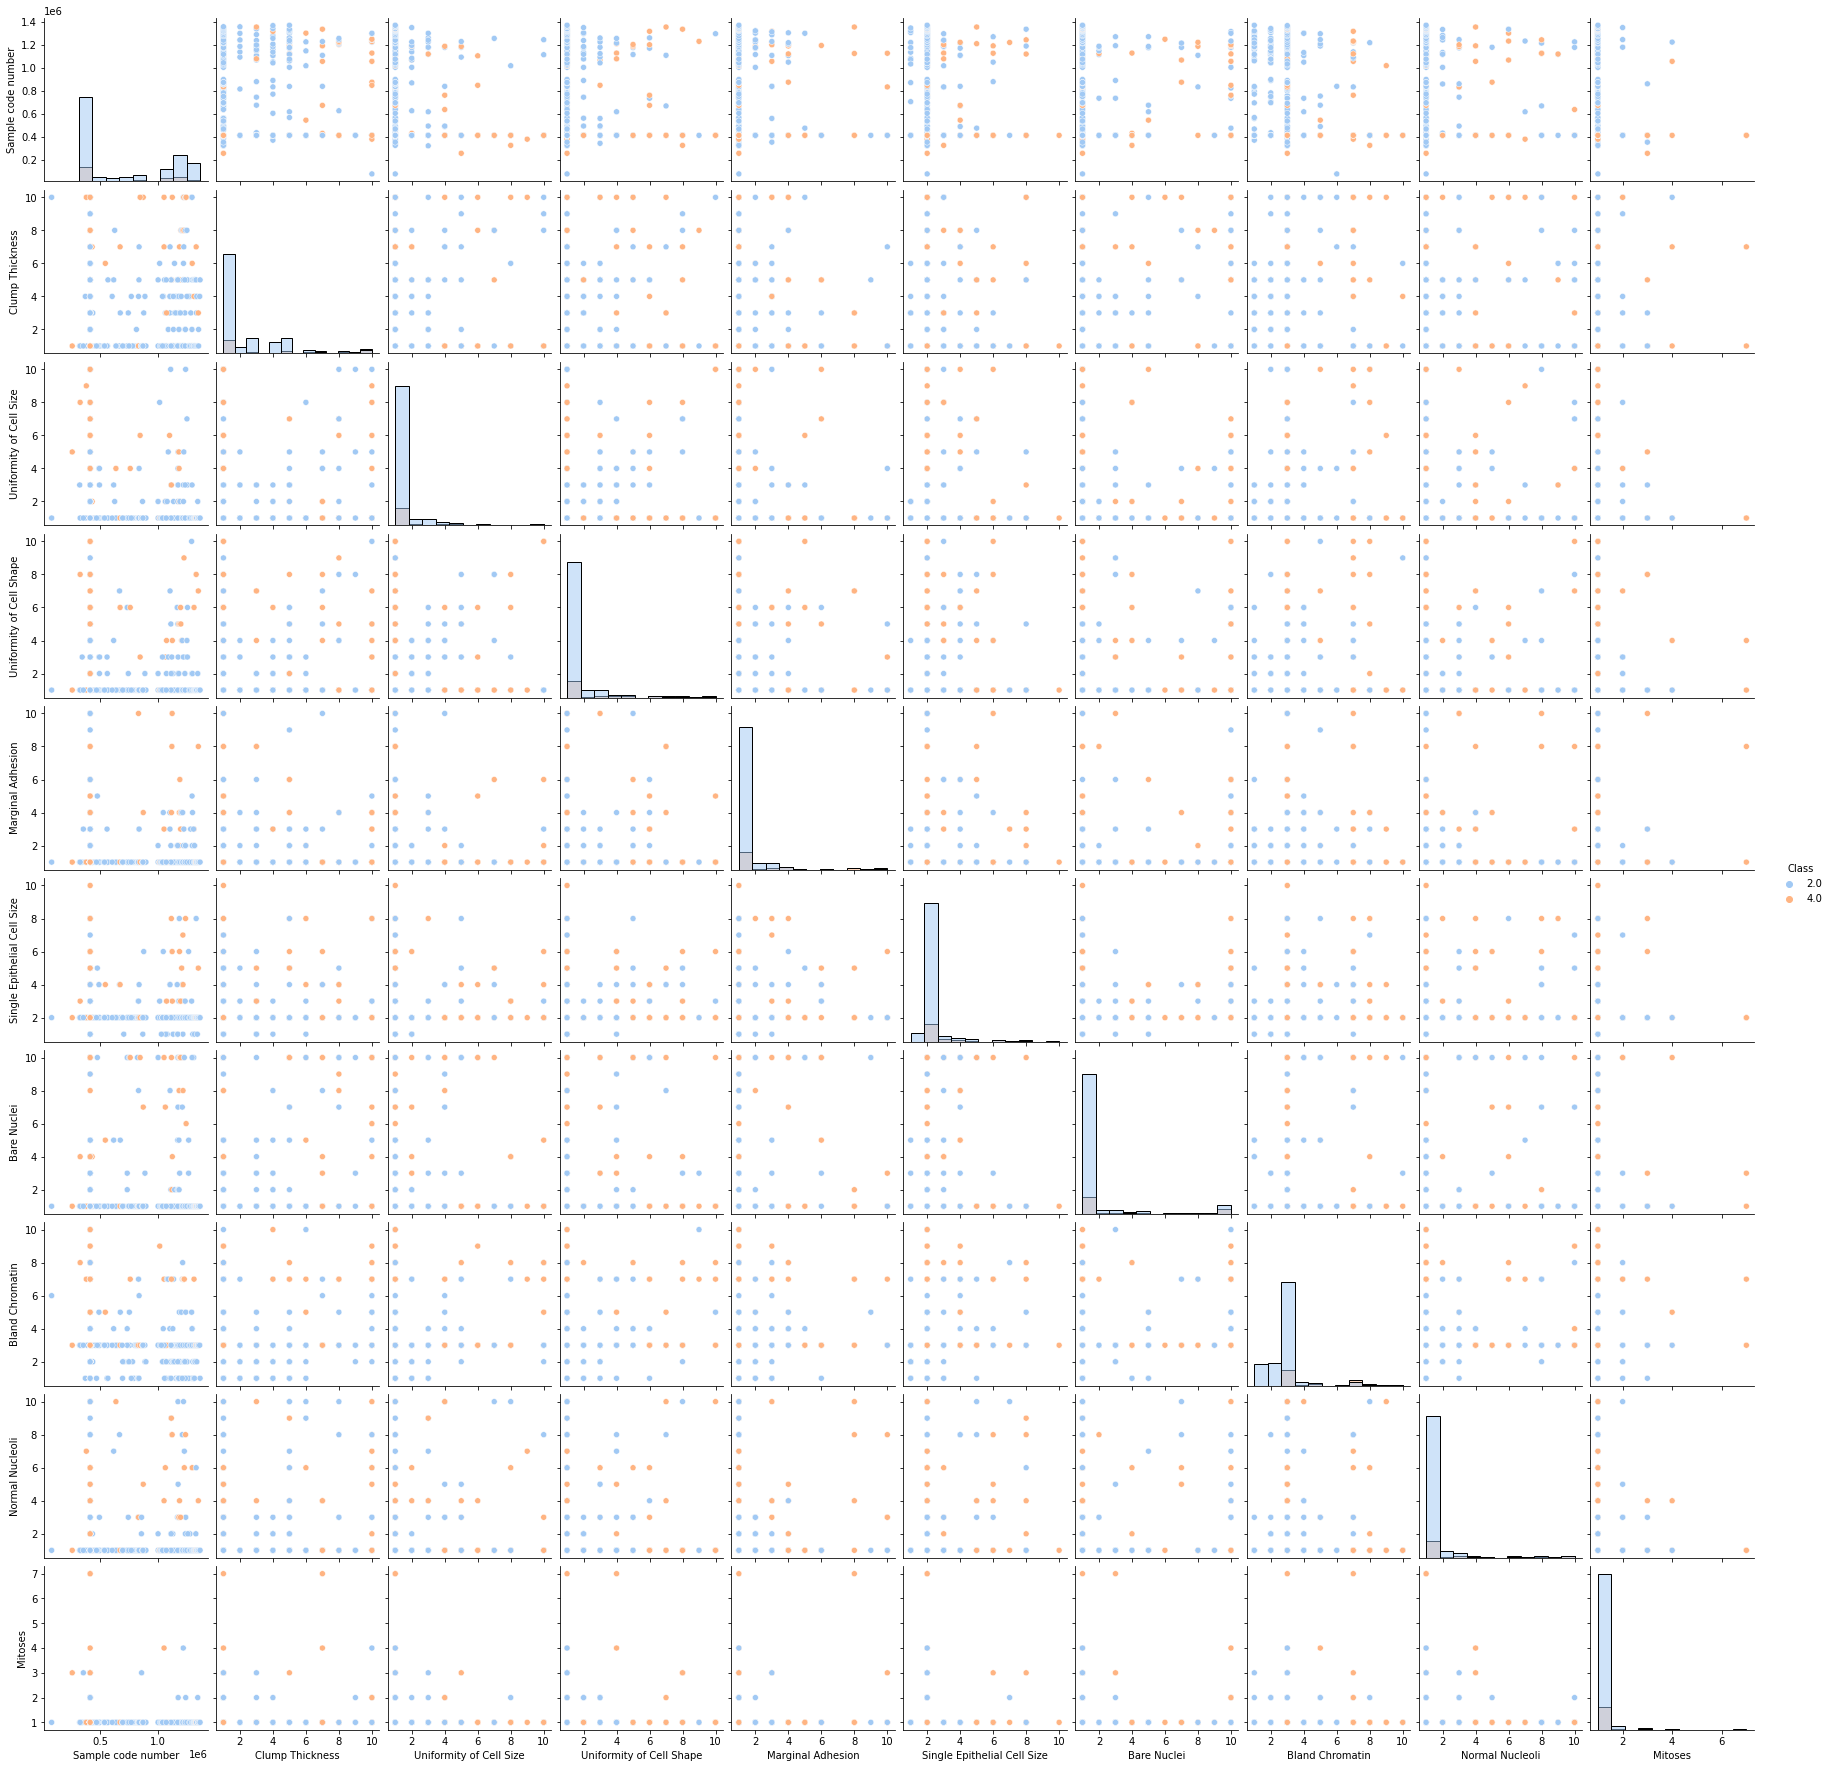

In [54]:
plt.figure(figsize=(12,8))
sns.pairplot(df, hue='Class', diag_kind='hist', palette='pastel')
plt.show()

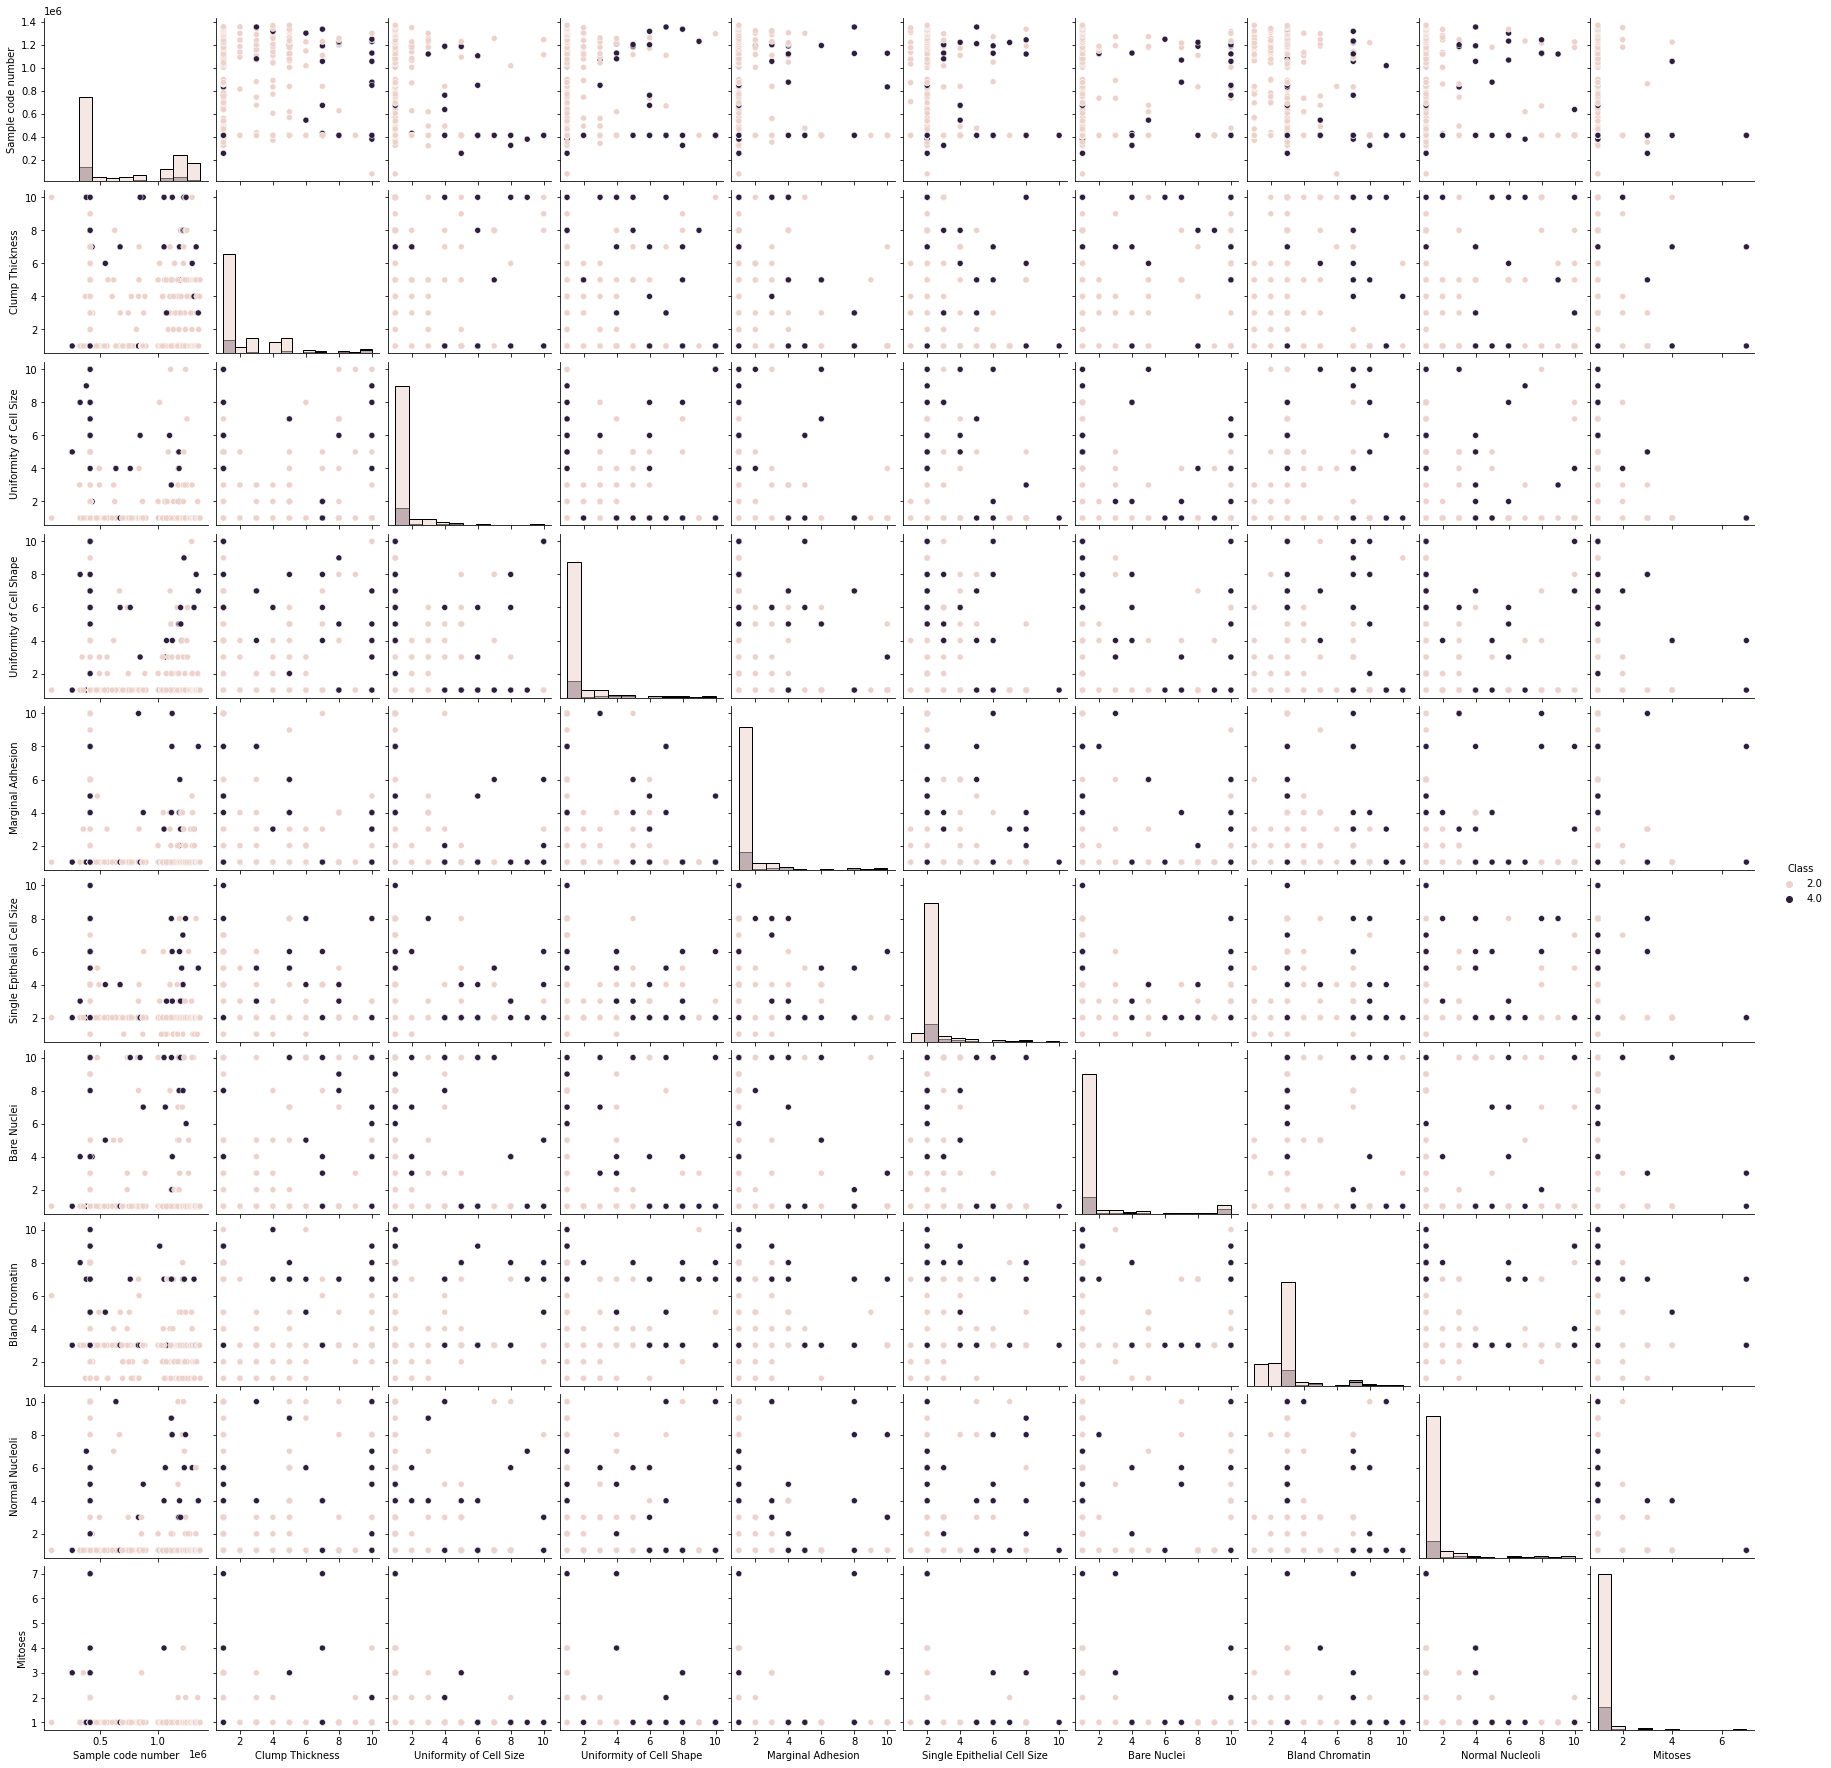

In [55]:
sns.pairplot(df, hue='Class', diag_kind='hist')
plt.show()